# IMPORTANTE
### DOCUMENTACION AREPO : https://arepo-code.org/wp-content/userguide/snapshotformat.html

In [1]:
import h5py

snap = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/snapshot_127.0.hdf5','r')

In [2]:
def printname(name):
    print (name)
snap.visit(printname)

Config
Header
Parameters
PartType0
PartType0/AllowRefinement
PartType0/Coordinates
PartType0/Density
PartType0/ElectronAbundance
PartType0/EnergyDissipation
PartType0/GFM_AGNRadiation
PartType0/GFM_CoolingRate
PartType0/GFM_Metallicity
PartType0/GFM_Metals
PartType0/GFM_RProcess
PartType0/GFM_WindDMVelDisp
PartType0/GFM_WindHostHaloMass
PartType0/HighResGasMass
PartType0/InternalEnergy
PartType0/Machnumber
PartType0/MagneticField
PartType0/MagneticFieldDivergence
PartType0/Masses
PartType0/NeutralHydrogenAbundance
PartType0/ParticleIDs
PartType0/Potential
PartType0/StarFormationRate
PartType0/Velocities
PartType1
PartType1/Coordinates
PartType1/Masses
PartType1/ParticleIDs
PartType1/Potential
PartType1/Velocities
PartType2
PartType2/Coordinates
PartType2/Masses
PartType2/ParticleIDs
PartType2/Potential
PartType2/Velocities
PartType3
PartType3/Coordinates
PartType3/Masses
PartType3/ParticleIDs
PartType3/Potential
PartType3/Velocities
PartType4
PartType4/BirthDensity
PartType4/BirthPos
P

### Particle Type

- PartType0 = Gas
- PartType1 = Halo (Dark Matter)
- PartType2 = Disk
- PartType3 = Bulge
- PartType4 = Star
- PartType5 = Bndry (Black Holes)

PartType 2 and 3 are not used

In [3]:
print (snap.get('Header').attrs.keys())


<KeysViewHDF5 ['BoxSize', 'Composition_vector_length', 'Flag_Cooling', 'Flag_DoublePrecision', 'Flag_Feedback', 'Flag_Metals', 'Flag_Sfr', 'Flag_StellarAge', 'Git_commit', 'Git_date', 'HubbleParam', 'MassTable', 'NumFilesPerSnapshot', 'NumPart_ThisFile', 'NumPart_Total', 'NumPart_Total_HighWord', 'Omega0', 'OmegaBaryon', 'OmegaLambda', 'Redshift', 'Time', 'UnitLength_in_cm', 'UnitMass_in_g', 'UnitVelocity_in_cm_per_s']>


In [4]:
list(snap.get('Parameters').attrs.keys())

['AGB_MassTransferOn',
 'ActivePartFracForNewDomainDecomp',
 'AdaptiveHydroSofteningSpacing',
 'BHFrictionAvgTime',
 'BHFrictionCoefficient',
 'BlackHoleAccretionFactor',
 'BlackHoleEddingtonFactor',
 'BlackHoleFeedbackFactor',
 'BlackHoleMaxAccretionRadius',
 'BlackHoleRadiativeEfficiency',
 'BoxSize',
 'CellMaxAngleFactor',
 'CellShapingSpeed',
 'ComovingIntegrationOn',
 'CoolingOn',
 'CoolingTablePath',
 'CourantFac',
 'CpuTimeBetRestartFile',
 'CritOverDensity',
 'CritPhysDensity',
 'DerefinementCriterion',
 'DesLinkNgb',
 'DesNumNgb',
 'DesNumNgbBlackHole',
 'DesNumNgbEnrichment',
 'ErrTolForceAcc',
 'ErrTolIntAccuracy',
 'ErrTolTheta',
 'ErrTolThetaSubfind',
 'FactorEVP',
 'GasSoftFactor',
 'GravityConstantInternal',
 'HubbleParam',
 'ICFormat',
 'IMF_MaxMass_Msun',
 'IMF_MinMass_Msun',
 'InitCondFile',
 'InitGasTemp',
 'LimitUBelowCertainDensityToThisValue',
 'LimitUBelowThisDensity',
 'MHDSeedDir',
 'MHDSeedValue',
 'MaxMemSize',
 'MaxNumNgbDeviation',
 'MaxNumNgbDeviationEnric

In [5]:
a =snap.get('Header').attrs['Time']
print (a)

0.9999999999999996


In [6]:
h =snap.get('Header').attrs['HubbleParam']
print (h)

0.6777


In [7]:
list(snap.items())

[('Config', <HDF5 group "/Config" (0 members)>),
 ('Header', <HDF5 group "/Header" (0 members)>),
 ('Parameters', <HDF5 group "/Parameters" (0 members)>),
 ('PartType0', <HDF5 group "/PartType0" (23 members)>),
 ('PartType1', <HDF5 group "/PartType1" (5 members)>),
 ('PartType2', <HDF5 group "/PartType2" (5 members)>),
 ('PartType3', <HDF5 group "/PartType3" (5 members)>),
 ('PartType4', <HDF5 group "/PartType4" (15 members)>),
 ('PartType5', <HDF5 group "/PartType5" (31 members)>),
 ('PartType6', <HDF5 group "/PartType6" (2 members)>)]

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127')


def load(path):
    with h5py.File(path,'r') as snap:
        pstr = snap['PartType4/Coordinates'][()]
        pdrk = snap['PartType1/Coordinates'][()]
        pgas = snap['PartType0/Coordinates'][()]
#         mstr = snap['PartType4/Masses'][()]
        vstr = snap['PartType4/Velocities'][()]

    return {'StrPos': pstr, 
            'DrkPos': pdrk, 
            'GasPos': pgas, 
            'StrVel': vstr}

with joblib.Parallel(n_jobs=1) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))

pos_str = np.concatenate([r['StrPos']for r in results])
pos_drk = np.concatenate([r['DrkPos']for r in results])
pos_gas = np.concatenate([r['GasPos']for r in results])
vel_str = np.concatenate([r['StrVel']for r in results])

gc.collect()

CPU times: user 44.8 s, sys: 18.9 s, total: 1min 3s
Wall time: 7.48 s


0

In [4]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/'

pos_str = []
pos_drk = []
pos_gas = []
vel_str = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'snapshot_127.'+ str('%s'%i) +'.hdf5','r')
    
    pstr = snap['PartType4/Coordinates'][()]
    pdrk = snap['PartType1/Coordinates'][()]
    pgas = snap['PartType0/Coordinates'][()]
    vstr = snap['PartType4/Velocities'][()]
    
    pos_str.append(pstr)
    pos_drk.append(pdrk)
    pos_gas.append(pgas)
    vel_str.append(vstr)

pos_str = np.concatenate(pos_str)
pos_drk = np.concatenate(pos_drk)
pos_gas = np.concatenate(pos_gas)
vel_str = np.concatenate(vel_str)

gc.collect()

CPU times: user 43.7 s, sys: 21.6 s, total: 1min 5s
Wall time: 8.46 s


0

In [5]:
print (np.shape(np.concatenate(pos_str)))

(29807015, 3)


In [1]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/'

pos_str = []
pos_drk = []
pos_gas = []
vel_str = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'snapshot_127.'+ str('%s'%i) +'.hdf5','r')
    
    pstr = snap['PartType4/Coordinates'][()]
    pdrk = snap['PartType1/Coordinates'][()]
    pgas = snap['PartType0/Coordinates'][()]
    vstr = snap['PartType4/Velocities'][()]
    
    pos_str.append(pstr)
    pos_drk.append(pdrk)
    pos_gas.append(pgas)
    vel_str.append(vstr)

pos_str = np.concatenate(pos_str)
pos_drk = np.concatenate(pos_drk)
pos_gas = np.concatenate(pos_gas)
vel_str = np.concatenate(vel_str)

gc.collect()

CPU times: user 48.3 s, sys: 18.4 s, total: 1min 6s
Wall time: 7.34 s


0

In [33]:
%%time
import numpy as np
pos_str = np.concatenate([r['StrPos']for r in results])
pos_drk = np.concatenate([r['DrkPos']for r in results])
pos_gas = np.concatenate([r['GasPos']for r in results])
vel_str = np.concatenate([r['StrVel']for r in results])

CPU times: user 33 s, sys: 27.1 s, total: 1min
Wall time: 1.9 s


In [10]:
xstr = pos_str[:,0]
ystr = pos_str[:,1]
zstr = pos_str[:,2]

xdrk = pos_drk[:,0]
ydrk = pos_drk[:,1]
zdrk = pos_drk[:,2]

xgas = pos_gas[:,0]
ygas = pos_gas[:,1]
zgas = pos_gas[:,2]

# r = np.sqrt(x**2 + y**2 + z**2)

# mask, = np.where(r<0.1)

CPU times: user 51.2 s, sys: 9.86 s, total: 1min 1s
Wall time: 22.3 s


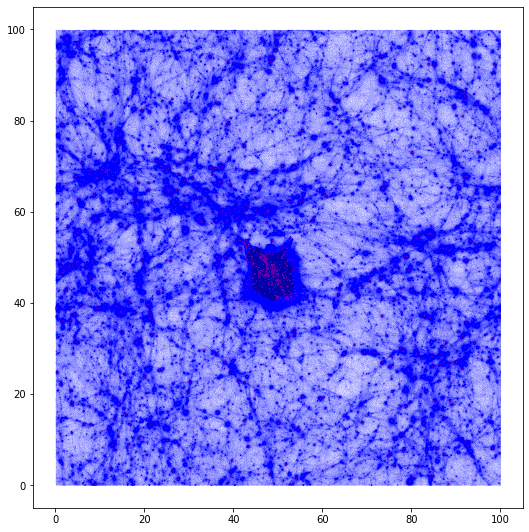

In [15]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk,ydrk,'.k',markersize=0.005)
ax.plot(xgas,ygas,'.b',markersize=0.008)
ax.plot(xstr,ystr,'.m',markersize=0.008)



CPU times: user 49.3 s, sys: 16.8 s, total: 1min 6s
Wall time: 28.7 s


(40, 60)

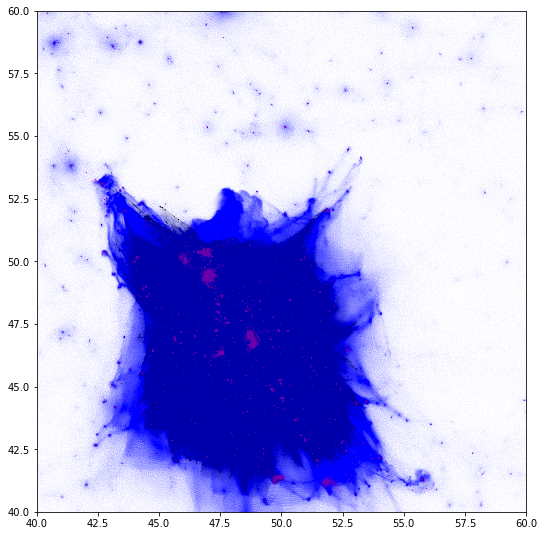

In [16]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk,ydrk,'.k',markersize=0.005)
ax.plot(xgas,ygas,'.b',markersize=0.008)
ax.plot(xstr,ystr,'.m',markersize=0.008)
ax.set_xlim(40,60)
ax.set_ylim(40,60)

In [1]:
import h5py
subhalo = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/fof_subhalo_tab_127.0.hdf5','r')

In [18]:
list(subhalo.get('Header').attrs.keys())

['BoxSize',
 'FlagDoubleprecision',
 'Git_commit',
 'Git_date',
 'HubbleParam',
 'Ngroups_ThisFile',
 'Ngroups_Total',
 'Nids_ThisFile',
 'Nids_Total',
 'Nsubgroups_ThisFile',
 'Nsubgroups_Total',
 'NumFiles',
 'Omega0',
 'OmegaLambda',
 'Redshift',
 'Time']

In [19]:
def printname(name):
    print (name)
subhalo.visit(printname)

Config
Group
Group/GroupBHMass
Group/GroupBHMdot
Group/GroupCM
Group/GroupFirstSub
Group/GroupGasMetalFractions
Group/GroupGasMetallicity
Group/GroupLen
Group/GroupLenType
Group/GroupMass
Group/GroupMassType
Group/GroupNsubs
Group/GroupPos
Group/GroupRadioLuminosity
Group/GroupSFR
Group/GroupStarMetalFractions
Group/GroupStarMetallicity
Group/GroupVel
Group/GroupWindMass
Group/GroupXrayLuminosity
Group/Group_M_Crit200
Group/Group_M_Crit500
Group/Group_M_Mean200
Group/Group_M_TopHat200
Group/Group_R_Crit200
Group/Group_R_Crit500
Group/Group_R_Mean200
Group/Group_R_TopHat200
Header
IDs
Parameters
Subhalo
Subhalo/SubhaloBHMass
Subhalo/SubhaloBHMdot
Subhalo/SubhaloBfldDisk
Subhalo/SubhaloBfldHalo
Subhalo/SubhaloCM
Subhalo/SubhaloGasMetalFractions
Subhalo/SubhaloGasMetalFractionsHalfRad
Subhalo/SubhaloGasMetalFractionsMaxRad
Subhalo/SubhaloGasMetalFractionsSfr
Subhalo/SubhaloGasMetalFractionsSfrWeighted
Subhalo/SubhaloGasMetallicity
Subhalo/SubhaloGasMetallicityHalfRad
Subhalo/SubhaloGasMet

In [15]:
import numpy as np
sub_mass_type = subhalo['Subhalo/SubhaloMassType'][()]

print (np.shape(sub_mass_type))
print (sub_mass_type[4].max())

(3190, 7)
1.2963216


In [16]:
%%time
import gc
import joblib
import h5py
import pathlib

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127')


def load(path):
    with h5py.File(path,'r') as snap:
        group = snap['Group/GroupMass'][()]
        sub_mass = snap['Subhalo/SubhaloMass'][()]
        sub_CM   = snap['Subhalo/SubhaloCM'][()]
        sub_Pos  = snap['Subhalo/SubhaloPos'][()]

    return {'Group': group,'SubMass': sub_mass, 'SubCM': sub_CM, 'SubPos': sub_Pos}

with joblib.Parallel(n_jobs=8) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)
gc.collect()

CPU times: user 126 ms, sys: 176 ms, total: 301 ms
Wall time: 2.49 s


136

In [22]:
a =snap.get('Header').attrs['Time']
print (a)

0.9999999999999996


In [17]:
%%time
import numpy as np
Mgroup = np.concatenate([r['Group']for r in results])
Smass = np.concatenate([r['SubMass']for r in results])
Scm   = np.concatenate([r['SubCM']for r in results])
Spos  = np.concatenate([r['SubPos']for r in results])

CPU times: user 1.34 ms, sys: 1.55 ms, total: 2.89 ms
Wall time: 2.12 ms


In [23]:
print (len(Smass))

81461


In [26]:
import numpy as np

print (np.shape(Spos))

sort = np.argsort(Smass)

SMass = Smass[sort][::-1]*1e10
print (SMass[:20])

(81461, 3)
[1.57527586e+12 1.16998734e+12 5.75789335e+11 5.55212800e+11
 2.35702452e+11 1.81163065e+11 1.61315209e+11 1.48673790e+11
 1.44135864e+11 1.43819964e+11 1.33386396e+11 1.26789853e+11
 1.21189327e+11 1.01114544e+11 9.09461750e+10 8.68756685e+10
 7.65613261e+10 7.44905114e+10 7.35222088e+10 6.67219395e+10]


In [ ]:
[48.81521  46.704514 53.605064]

[48.81521  46.704514 53.605064]

In [27]:
SCM  = Scm[sort][::-1]
SPOS = Spos[sort][::-1]

print (SCM[:20,:])
print ('-----')
print (SPOS[:20,:])

[[48.82009  46.723328 53.597187]
 [48.716347 47.062702 53.338043]
 [46.97764  49.45291  51.766094]
 [47.52763  46.363068 54.831375]
 [47.32753  47.25789  51.91318 ]
 [47.791542 47.557568 53.32627 ]
 [47.411304 48.30691  52.662704]
 [49.867714 47.256065 52.22432 ]
 [45.625298 46.92564  54.10303 ]
 [48.524456 48.034508 51.99446 ]
 [46.999523 49.672398 51.440052]
 [46.847164 46.25087  55.3823  ]
 [46.910072 50.35484  50.48083 ]
 [47.56072  48.62583  52.290848]
 [46.062843 50.056206 51.221096]
 [49.60781  44.903294 55.674023]
 [50.032135 44.55581  56.25268 ]
 [46.8999   49.439217 51.809616]
 [49.736343 41.361874 58.553524]
 [46.81061  50.41416  50.400288]]
-----
[[48.81521  46.704514 53.605064]
 [48.71576  47.06235  53.33718 ]
 [46.974728 49.455475 51.771206]
 [47.528534 46.364803 54.832882]
 [47.325207 47.259197 51.91327 ]
 [47.791496 47.55743  53.327   ]
 [47.41012  48.306732 52.663097]
 [49.867104 47.25419  52.225414]
 [45.62381  46.928238 54.103687]
 [48.525105 48.03401  51.99552 ]
 [4

In [28]:
%%time
import random
adrk = random.choices(np.arange(len(xdrk)),k=np.int(len(xdrk)*0.001)) 
astr = random.choices(np.arange(len(xstr)),k=np.int(len(xstr)*0.001)) 
# agas = random.choices(np.arange(len(xgas)),k=np.int(len(xgas)/10)) 


CPU times: user 258 ms, sys: 277 ms, total: 534 ms
Wall time: 531 ms


In [9]:
%matplotlib widget


In [31]:
import gc

fig.clear()
plt.close(fig)
gc.collect()

22

CPU times: user 6.3 s, sys: 369 ms, total: 6.67 s
Wall time: 513 ms


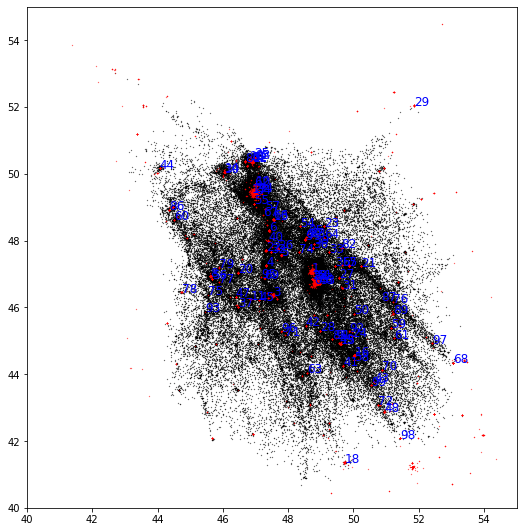

In [34]:
%%time 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk[adrk],ydrk[adrk],'.k',markersize=0.5)
# ax.plot(xgas[agas],ygas[agas],'.b',markersize=0.008)
ax.plot(xstr[astr],ystr[astr],'.r',markersize=0.5)
ax.set_xlim(40,55)
ax.set_ylim(40,55)
for i in range(0,100):
    ax.text(SPOS[i,0],SPOS[i,1],str('%s'%i),fontsize=12,color='b')

fig.savefig('../_imagenes/subhalos.png', dpi = 100, xxbox_inches='tight')

# Grafico el primer halo mas masivo

In [39]:
CM1  = SPOS[0,:]
SUB1 = SMass[0]

print('mass=',SUB1,'CM=',CM1)

mass= 1575275900000.0 CM= [48.81521  46.704514 53.605064]


In [40]:
xstr1 = pos_str[:,0]-CM1[0]
ystr1 = pos_str[:,1]-CM1[1]
zstr1 = pos_str[:,2]-CM1[2]

xdrk1 = pos_drk[:,0]-CM1[0]
ydrk1 = pos_drk[:,1]-CM1[1]
zdrk1 = pos_drk[:,2]-CM1[2]

xgas1 = pos_gas[:,0]-CM1[0]
ygas1 = pos_gas[:,1]-CM1[1]
zgas1 = pos_gas[:,2]-CM1[2]

In [41]:
rstr = np.sqrt(xstr1**2 + ystr1**2 + zstr1**2)
rdrk = np.sqrt(xdrk1**2 + ydrk1**2 + zdrk1**2)
rgas = np.sqrt(xgas1**2 + ygas1**2 + zgas1**2)

mask_str, = np.where(rstr<1)
mask_drk, = np.where(rdrk<1)
mask_gas, = np.where(rgas<1)

CPU times: user 23.8 s, sys: 2.66 s, total: 26.4 s
Wall time: 4.2 s


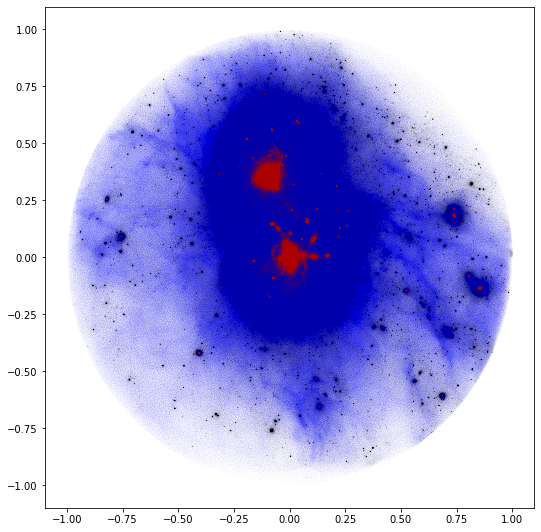

In [42]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],ydrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xgas1[mask_gas],ygas1[mask_gas],'.b',markersize=0.008)
ax.plot(xstr1[mask_str],ystr1[mask_str],'.r',markersize=0.008)


In [43]:
rstr = np.sqrt(xstr1**2 + ystr1**2 + zstr1**2)
rdrk = np.sqrt(xdrk1**2 + ydrk1**2 + zdrk1**2)
rgas = np.sqrt(xgas1**2 + ygas1**2 + zgas1**2)

mask_str, = np.where(rstr<0.25)
mask_drk, = np.where(rdrk<0.25)
mask_gas, = np.where(rgas<0.25)

CPU times: user 19.8 s, sys: 1.53 s, total: 21.3 s
Wall time: 1.68 s


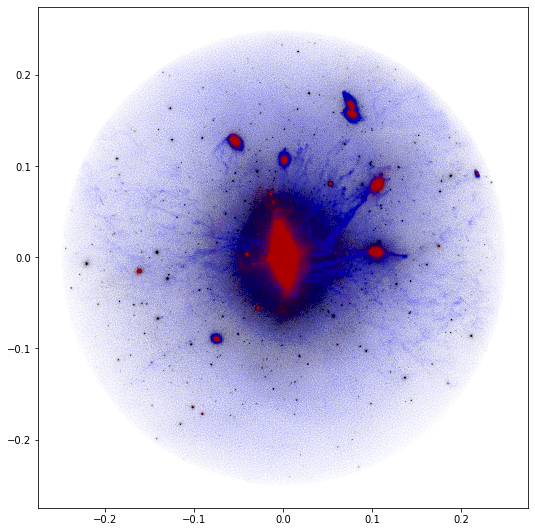

In [44]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],ydrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xgas1[mask_gas],ygas1[mask_gas],'.b',markersize=0.008)
ax.plot(xstr1[mask_str],ystr1[mask_str],'.r',markersize=0.008)


In [45]:
rstr = np.sqrt(xstr1**2 + ystr1**2 + zstr1**2)
rdrk = np.sqrt(xdrk1**2 + ydrk1**2 + zdrk1**2)
rgas = np.sqrt(xgas1**2 + ygas1**2 + zgas1**2)

mask_str, = np.where(rstr<0.05)
mask_drk, = np.where(rdrk<0.05)
mask_gas, = np.where(rgas<0.05)

In [54]:
import rotation_mio as rot

mstr = MASS4[mask_str]
v_x = vel_str[:,0][mask_str]
v_y = vel_str[:,1][mask_str]
v_z = vel_str[:,2][mask_str]

veloc,=np.where(rstr[mask_str]<0.005)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr1[mask_str],ystr1[mask_str],zstr1[mask_str],vx,vy,vz,0.005)

xn_str = e1x*xstr1[mask_str] + e1y*ystr1[mask_str] + e1z*zstr1[mask_str]
yn_str = e2x*xstr1[mask_str] + e2y*ystr1[mask_str] + e2z*zstr1[mask_str]
zn_str = e3x*xstr1[mask_str] + e3y*ystr1[mask_str] + e3z*zstr1[mask_str]
# vxn_str = e1x*vx[mask_str] + e1y*vy[mask_str] + e1z*vz[mask_str]
# vyn_str = e2x*vx[mask_str] + e2y*vy[mask_str] + e2z*vz[mask_str]
# vzn_str = e3x*vx[mask_str] + e3y*vy[mask_str] + e3z*vz[mask_str]

xn_gas = e1x*xgas1[mask_gas] + e1y*ygas1[mask_gas] + e1z*zgas1[mask_gas]
yn_gas = e2x*xgas1[mask_gas] + e2y*ygas1[mask_gas] + e2z*zgas1[mask_gas]
zn_gas = e3x*xgas1[mask_gas] + e3y*ygas1[mask_gas] + e3z*zgas1[mask_gas]

xn_drk = e1x*xdrk1[mask_drk] + e1y*ydrk1[mask_drk] + e1z*zdrk1[mask_drk]
yn_drk = e2x*xdrk1[mask_drk] + e2y*ydrk1[mask_drk] + e2z*zdrk1[mask_drk]
zn_drk = e3x*xdrk1[mask_drk] + e3y*ydrk1[mask_drk] + e3z*zdrk1[mask_drk]

#  z = a0/aexp[isnap] - 1.
#         Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
#         time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
# #---aca paso las coordenadas respecto al centro de la galaxia------
#         xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
#         ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
#         zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
#         r = np.sqrt(xstr**2+ystr**2+zstr**2)
         
#         v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
#         v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
#         v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

CPU times: user 18.1 s, sys: 2.88 s, total: 21 s
Wall time: 1.71 s


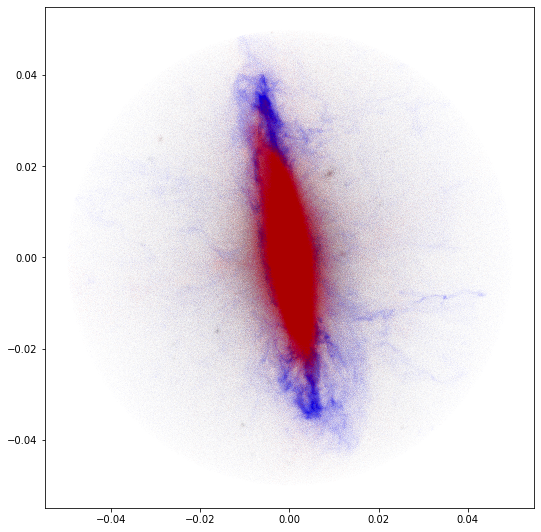

In [49]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk1[mask_drk],ydrk1[mask_drk],'.k',markersize=0.005)
ax.plot(xgas1[mask_gas],ygas1[mask_gas],'.b',markersize=0.008)
ax.plot(xstr1[mask_str],ystr1[mask_str],'.r',markersize=0.008)



CPU times: user 18.1 s, sys: 2.5 s, total: 20.6 s
Wall time: 1.25 s


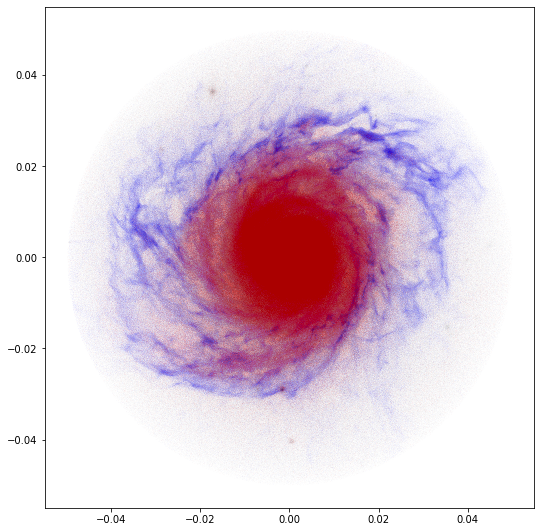

In [55]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xn_drk,yn_drk,'.k',markersize=0.005)
ax.plot(xn_gas,yn_gas,'.b',markersize=0.008)
ax.plot(xn_str,yn_str,'.r',markersize=0.008)



CPU times: user 18.1 s, sys: 2.33 s, total: 20.4 s
Wall time: 1.12 s


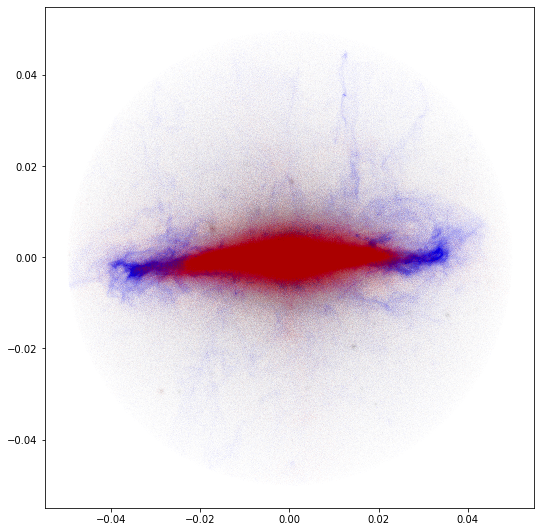

In [56]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xn_drk,zn_drk,'.k',markersize=0.005)
ax.plot(xn_gas,zn_gas,'.b',markersize=0.008)
ax.plot(xn_str,zn_str,'.r',markersize=0.008)



# Grafico el segundo halo mas masivo

In [57]:
CM2  = SPOS[1,:]
SUB2 = SMass[1]

print('mass=',SUB2,'CM=',CM2)

mass= 1169987300000.0 CM= [48.71576 47.06235 53.33718]


In [58]:
xstr2 = pos_str[:,0]-CM2[0]
ystr2 = pos_str[:,1]-CM2[1]
zstr2 = pos_str[:,2]-CM2[2]

xdrk2 = pos_drk[:,0]-CM2[0]
ydrk2 = pos_drk[:,1]-CM2[1]
zdrk2 = pos_drk[:,2]-CM2[2]

xgas2 = pos_gas[:,0]-CM2[0]
ygas2 = pos_gas[:,1]-CM2[1]
zgas2 = pos_gas[:,2]-CM2[2]

In [30]:
rstr = np.sqrt(xstr2**2 + ystr2**2 + zstr2**2)
rdrk = np.sqrt(xdrk2**2 + ydrk2**2 + zdrk2**2)
rgas = np.sqrt(xgas2**2 + ygas2**2 + zgas2**2)

mask_str, = np.where(rstr<1)
mask_drk, = np.where(rdrk<1)
mask_gas, = np.where(rgas<1)

CPU times: user 15.1 s, sys: 5.53 s, total: 20.6 s
Wall time: 4.64 s


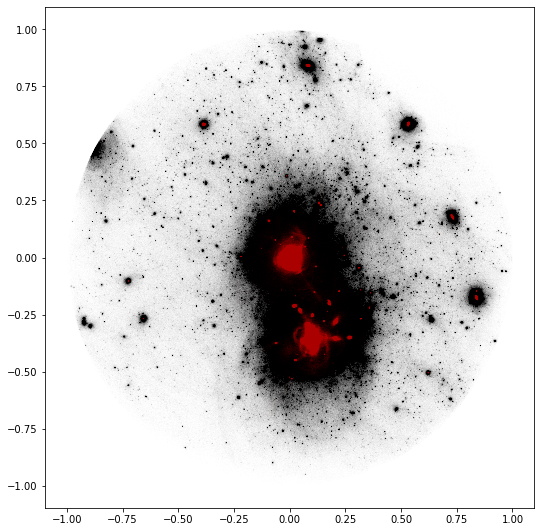

In [31]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],ydrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xstr2[mask_str],ystr2[mask_str],'.r',markersize=0.01)


In [59]:
rstr = np.sqrt(xstr2**2 + ystr2**2 + zstr2**2)
rdrk = np.sqrt(xdrk2**2 + ydrk2**2 + zdrk2**2)
rgas = np.sqrt(xgas2**2 + ygas2**2 + zgas2**2)

mask_str, = np.where(rstr<0.25)
mask_drk, = np.where(rdrk<0.25)
mask_gas, = np.where(rgas<0.25)

CPU times: user 19 s, sys: 3.7 s, total: 22.7 s
Wall time: 2.64 s


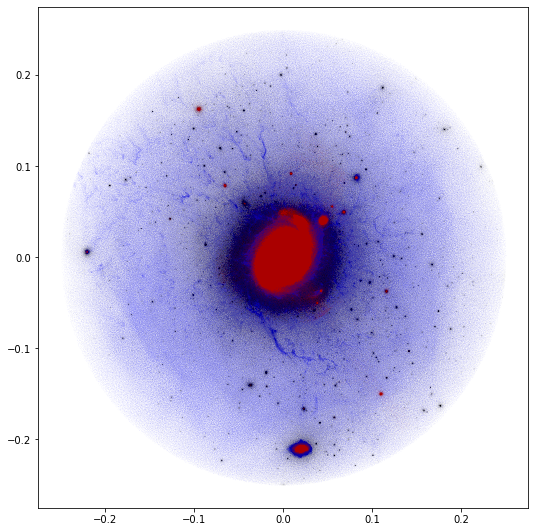

In [60]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],ydrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xgas2[mask_gas],ygas2[mask_gas],'.b',markersize=0.008)
ax.plot(xstr2[mask_str],ystr2[mask_str],'.r',markersize=0.008)


In [61]:
rstr = np.sqrt(xstr2**2 + ystr2**2 + zstr2**2)
rdrk = np.sqrt(xdrk2**2 + ydrk2**2 + zdrk2**2)
rgas = np.sqrt(xgas2**2 + ygas2**2 + zgas2**2)

mask_str, = np.where(rstr<0.05)
mask_drk, = np.where(rdrk<0.05)
mask_gas, = np.where(rgas<0.05)

CPU times: user 18.1 s, sys: 2.59 s, total: 20.7 s
Wall time: 1.43 s


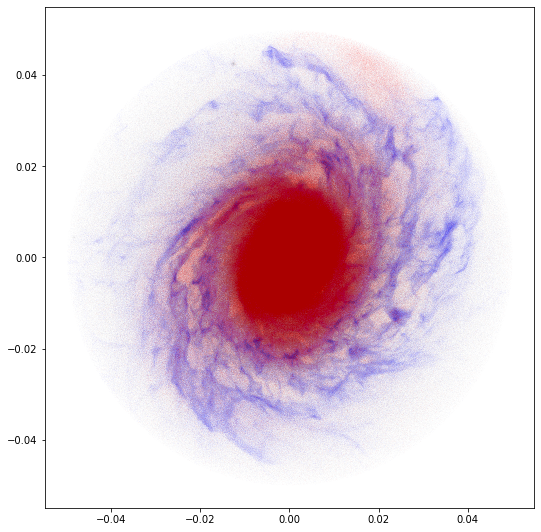

In [62]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk2[mask_drk],ydrk2[mask_drk],'.k',markersize=0.005)
ax.plot(xgas2[mask_gas],ygas2[mask_gas],'.b',markersize=0.008)
ax.plot(xstr2[mask_str],ystr2[mask_str],'.r',markersize=0.008)


In [63]:
import rotation_mio as rot

mstr = MASS4[mask_str]
v_x = vel_str[:,0][mask_str]
v_y = vel_str[:,1][mask_str]
v_z = vel_str[:,2][mask_str]

veloc,=np.where(rstr[mask_str]<0.005)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr2[mask_str],ystr2[mask_str],zstr2[mask_str],vx,vy,vz,0.005)

xn_str = e1x*xstr2[mask_str] + e1y*ystr2[mask_str] + e1z*zstr2[mask_str]
yn_str = e2x*xstr2[mask_str] + e2y*ystr2[mask_str] + e2z*zstr2[mask_str]
zn_str = e3x*xstr2[mask_str] + e3y*ystr2[mask_str] + e3z*zstr2[mask_str]
# vxn_str = e1x*vx[mask_str] + e1y*vy[mask_str] + e1z*vz[mask_str]
# vyn_str = e2x*vx[mask_str] + e2y*vy[mask_str] + e2z*vz[mask_str]
# vzn_str = e3x*vx[mask_str] + e3y*vy[mask_str] + e3z*vz[mask_str]

xn_gas = e1x*xgas2[mask_gas] + e1y*ygas2[mask_gas] + e1z*zgas2[mask_gas]
yn_gas = e2x*xgas2[mask_gas] + e2y*ygas2[mask_gas] + e2z*zgas2[mask_gas]
zn_gas = e3x*xgas2[mask_gas] + e3y*ygas2[mask_gas] + e3z*zgas2[mask_gas]

xn_drk = e1x*xdrk2[mask_drk] + e1y*ydrk2[mask_drk] + e1z*zdrk2[mask_drk]
yn_drk = e2x*xdrk2[mask_drk] + e2y*ydrk2[mask_drk] + e2z*zdrk2[mask_drk]
zn_drk = e3x*xdrk2[mask_drk] + e3y*ydrk2[mask_drk] + e3z*zdrk2[mask_drk]

#  z = a0/aexp[isnap] - 1.
#         Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
#         time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
# #---aca paso las coordenadas respecto al centro de la galaxia------
#         xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
#         ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
#         zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
#         r = np.sqrt(xstr**2+ystr**2+zstr**2)
         
#         v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
#         v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
#         v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

CPU times: user 17.9 s, sys: 2.45 s, total: 20.3 s
Wall time: 1.14 s


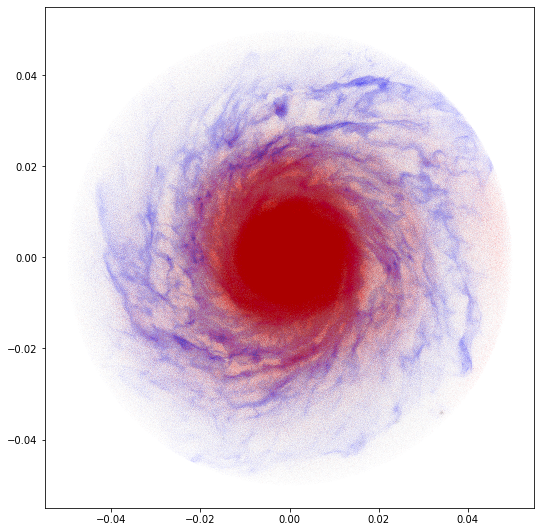

In [64]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xn_drk,yn_drk,'.k',markersize=0.005)
ax.plot(xn_gas,yn_gas,'.b',markersize=0.008)
ax.plot(xn_str,yn_str,'.r',markersize=0.008)



CPU times: user 18.3 s, sys: 2.46 s, total: 20.7 s
Wall time: 1.25 s


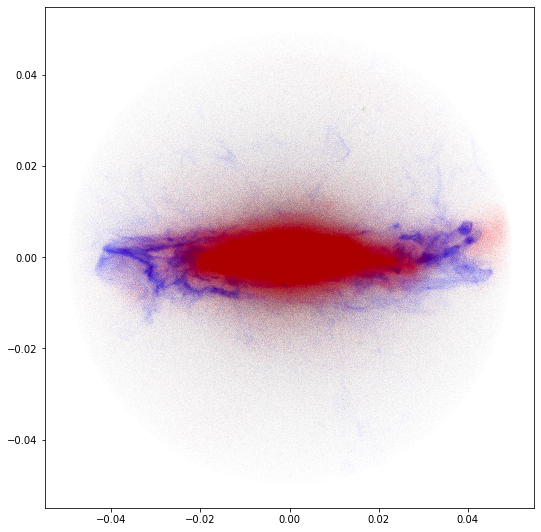

In [65]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xn_drk,zn_drk,'.k',markersize=0.005)
ax.plot(xn_gas,zn_gas,'.b',markersize=0.008)
ax.plot(xn_str,zn_str,'.r',markersize=0.008)



## Tercer halo mas masivo 

In [70]:
CM3  = SPOS[2,:]
SUB3 = SMass[2]

print('mass=',SUB3,'CM=',CM3)

mass= 575789330000.0 CM= [46.974728 49.455475 51.771206]


In [71]:
xstr3 = pos_str[:,0]-CM3[0]
ystr3 = pos_str[:,1]-CM3[1]
zstr3 = pos_str[:,2]-CM3[2]

xdrk3 = pos_drk[:,0]-CM3[0]
ydrk3 = pos_drk[:,1]-CM3[1]
zdrk3 = pos_drk[:,2]-CM3[2]

xgas3 = pos_gas[:,0]-CM3[0]
ygas3 = pos_gas[:,1]-CM3[1]
zgas3 = pos_gas[:,2]-CM3[2]

In [72]:
rstr = np.sqrt(xstr3**2 + ystr3**2 + zstr3**2)
rdrk = np.sqrt(xdrk3**2 + ydrk3**2 + zdrk3**2)
rgas = np.sqrt(xgas3**2 + ygas3**2 + zgas3**2)

mask_str, = np.where(rstr<0.25)
mask_drk, = np.where(rdrk<0.25)
mask_gas, = np.where(rgas<0.25)

CPU times: user 19.6 s, sys: 4.25 s, total: 23.8 s
Wall time: 3.42 s


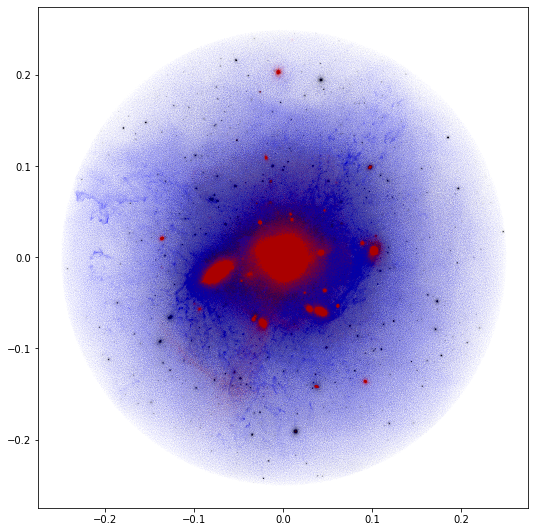

In [73]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xdrk3[mask_drk],ydrk3[mask_drk],'.k',markersize=0.005)
ax.plot(xgas3[mask_gas],ygas3[mask_gas],'.b',markersize=0.008)
ax.plot(xstr3[mask_str],ystr3[mask_str],'.r',markersize=0.008)


In [74]:
rstr = np.sqrt(xstr3**2 + ystr3**2 + zstr3**2)
rdrk = np.sqrt(xdrk3**2 + ydrk3**2 + zdrk3**2)
rgas = np.sqrt(xgas3**2 + ygas3**2 + zgas3**2)

mask_str, = np.where(rstr<0.05)
mask_drk, = np.where(rdrk<0.05)
mask_gas, = np.where(rgas<0.05)

In [75]:
import rotation_mio as rot

mstr = MASS4[mask_str]
v_x = vel_str[:,0][mask_str]
v_y = vel_str[:,1][mask_str]
v_z = vel_str[:,2][mask_str]

veloc,=np.where(rstr[mask_str]<0.005)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr3[mask_str],ystr3[mask_str],zstr3[mask_str],vx,vy,vz,0.005)

xn_str = e1x*xstr3[mask_str] + e1y*ystr3[mask_str] + e1z*zstr3[mask_str]
yn_str = e2x*xstr3[mask_str] + e2y*ystr3[mask_str] + e2z*zstr3[mask_str]
zn_str = e3x*xstr3[mask_str] + e3y*ystr3[mask_str] + e3z*zstr3[mask_str]
# vxn_str = e1x*vx[mask_str] + e1y*vy[mask_str] + e1z*vz[mask_str]
# vyn_str = e2x*vx[mask_str] + e2y*vy[mask_str] + e2z*vz[mask_str]
# vzn_str = e3x*vx[mask_str] + e3y*vy[mask_str] + e3z*vz[mask_str]

xn_gas = e1x*xgas3[mask_gas] + e1y*ygas3[mask_gas] + e1z*zgas3[mask_gas]
yn_gas = e2x*xgas3[mask_gas] + e2y*ygas3[mask_gas] + e2z*zgas3[mask_gas]
zn_gas = e3x*xgas3[mask_gas] + e3y*ygas3[mask_gas] + e3z*zgas3[mask_gas]

xn_drk = e1x*xdrk3[mask_drk] + e1y*ydrk3[mask_drk] + e1z*zdrk3[mask_drk]
yn_drk = e2x*xdrk3[mask_drk] + e2y*ydrk3[mask_drk] + e2z*zdrk3[mask_drk]
zn_drk = e3x*xdrk3[mask_drk] + e3y*ydrk3[mask_drk] + e3z*zdrk3[mask_drk]

#  z = a0/aexp[isnap] - 1.
#         Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
#         time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
# #---aca paso las coordenadas respecto al centro de la galaxia------
#         xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
#         ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
#         zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
#         r = np.sqrt(xstr**2+ystr**2+zstr**2)
         
#         v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
#         v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
#         v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

CPU times: user 17.8 s, sys: 2.05 s, total: 19.9 s
Wall time: 878 ms


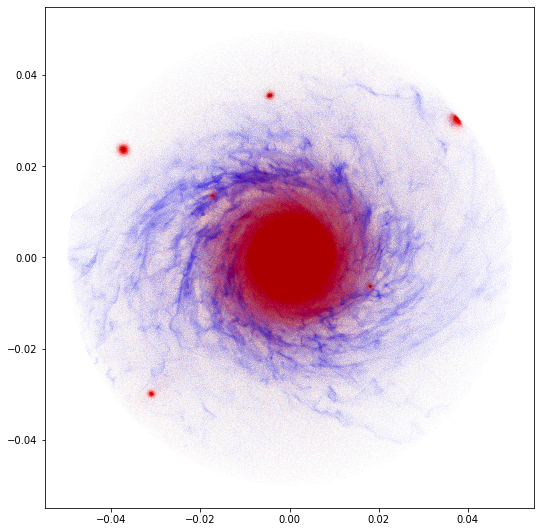

In [76]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xn_drk,yn_drk,'.k',markersize=0.005)
ax.plot(xn_gas,yn_gas,'.b',markersize=0.008)
ax.plot(xn_str,yn_str,'.r',markersize=0.008)



CPU times: user 17.6 s, sys: 2.16 s, total: 19.8 s
Wall time: 815 ms


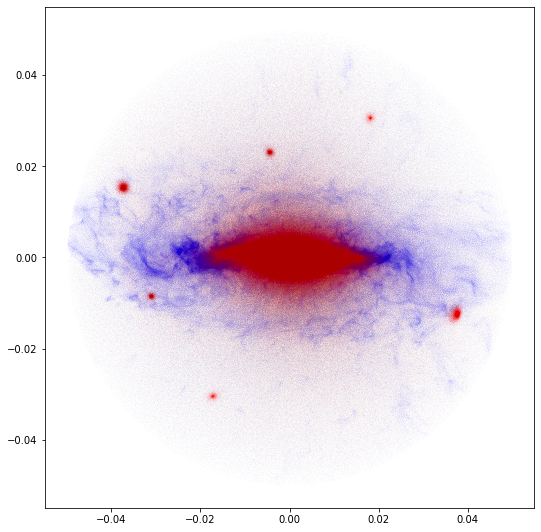

In [77]:
%%time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(xn_drk,zn_drk,'.k',markersize=0.005)
ax.plot(xn_gas,zn_gas,'.b',markersize=0.008)
ax.plot(xn_str,zn_str,'.r',markersize=0.008)



# Vemos los histogramas de las masas

In [36]:
%%time
import gc
import joblib
import h5py
import pathlib

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127')


def load(path):
    with h5py.File(path,'r') as snap:
        Mass0 = snap['PartType0/Masses'][()]
        Mass1 = snap['PartType1/Masses'][()]
        Mass2 = snap['PartType2/Masses'][()]
        Mass3 = snap['PartType3/Masses'][()]
        Mass4 = snap['PartType4/Masses'][()]
        Mass5 = snap['PartType5/Masses'][()]

    return {'M0': Mass0, 'M1': Mass1, 'M2': Mass2,'M3': Mass3,'M4': Mass4,'M5': Mass5}

with joblib.Parallel(n_jobs=8) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)
gc.collect()

CPU times: user 1.99 s, sys: 21.2 s, total: 23.2 s
Wall time: 25.5 s


2252

In [37]:
%%time
import numpy as np
MASS0 = np.concatenate([r['M0']for r in results])
MASS1 = np.concatenate([r['M1']for r in results])
MASS2 = np.concatenate([r['M2']for r in results])
MASS3 = np.concatenate([r['M3']for r in results])
MASS4 = np.concatenate([r['M4']for r in results])
MASS5 = np.concatenate([r['M5']for r in results])


CPU times: user 21.7 s, sys: 8.1 s, total: 29.8 s
Wall time: 935 ms


Text(0.5, 1.0, 'BH')

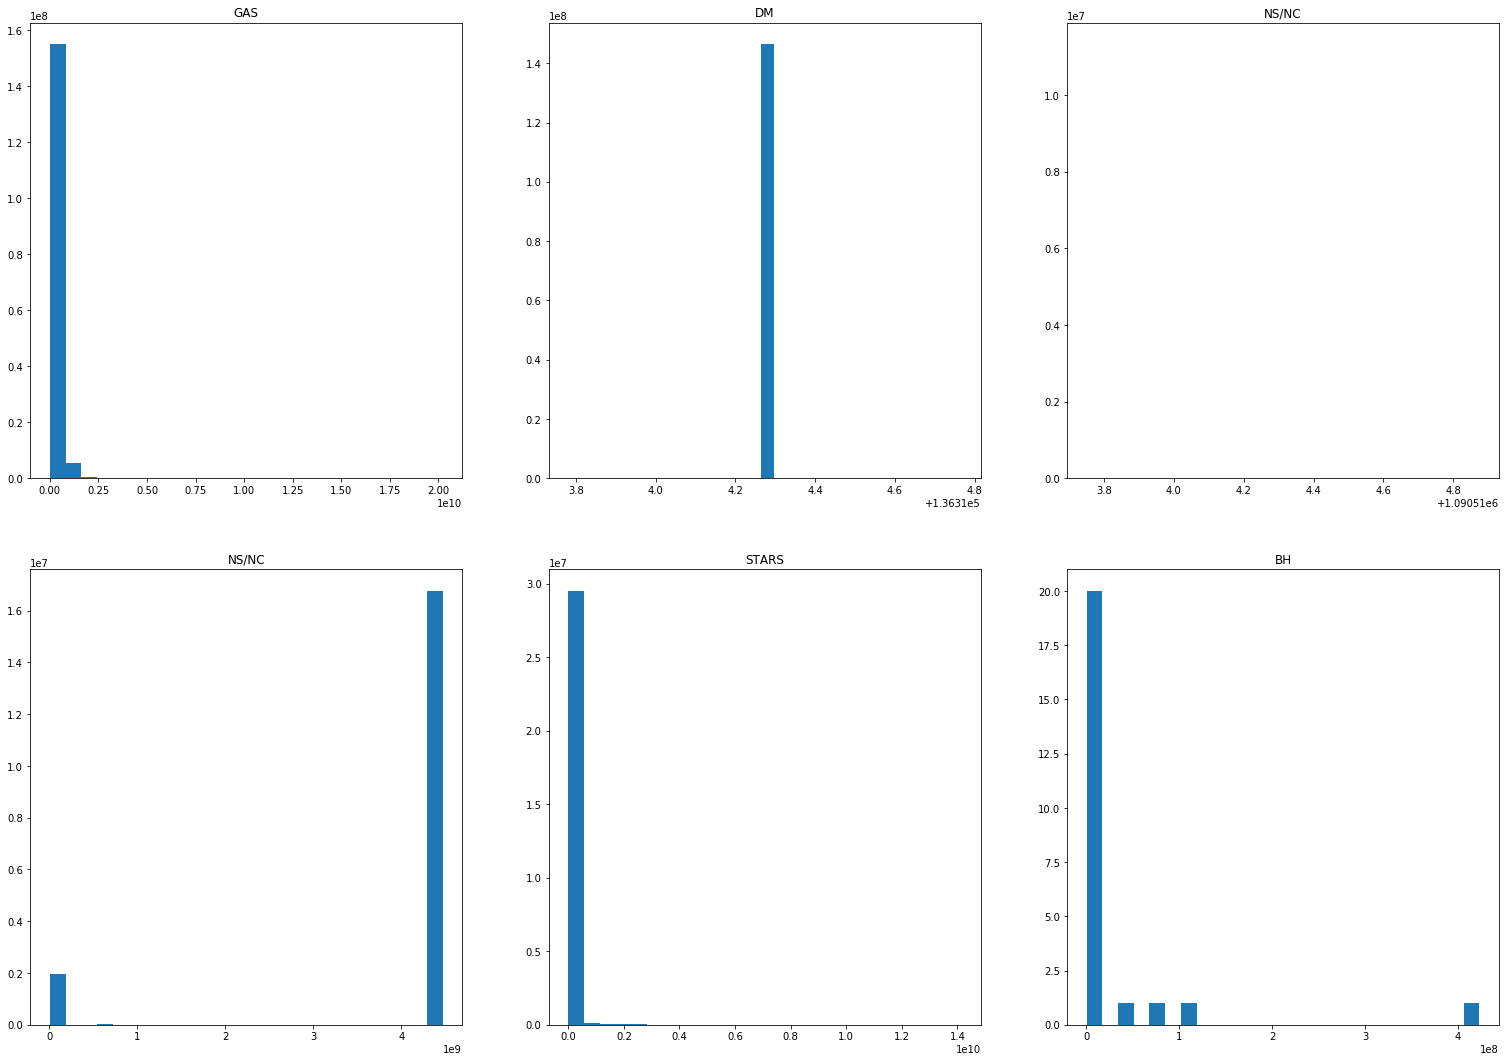

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax[0,0].hist(MASS0*1e10,bins=25)
ax[0,0].set_title('GAS')

ax[0,1].hist(MASS1*1e10,bins=25)
ax[0,1].set_title('DM')

ax[0,2].hist(MASS2*1e10,bins=25)
ax[0,2].set_title('NS/NC')

ax[1,0].hist(MASS3*1e10,bins=25)
ax[1,0].set_title('NS/NC')

ax[1,1].hist(MASS4*1e10,bins=25)
ax[1,1].set_title('STARS')

ax[1,2].hist(MASS5*1e10,bins=25)
ax[1,2].set_title('BH')




In [54]:
MASS0*1e10

array([22251.547, 18033.79 , 18042.361, ..., 20680.863, 30331.514,
       27699.934], dtype=float32)

In [51]:
MASS1*1e10

array([136314.28, 136314.28, 136314.28, ..., 136314.28, 136314.28,
       136314.28], dtype=float32)

In [52]:
MASS4*1e10

array([11857.988, 10214.846, 17880.154, ..., 13042.379, 18149.684,
       16644.602], dtype=float32)